In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df_ship_mode = df[['Ship Mode','Category','Quantity']].groupby(['Ship Mode','Category']).sum('Quantity')
df_ship_mode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

<Axes: xlabel='Ship Mode', ylabel='Sum of Quantity'>

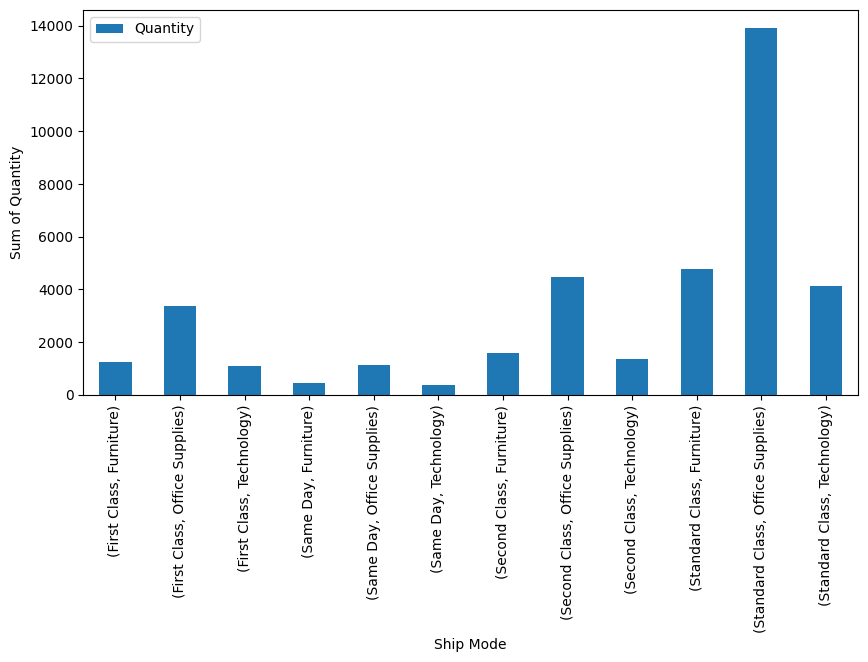

In [16]:
df_ship_mode.plot(kind='bar', ylabel='Sum of Quantity', xlabel='Ship Mode', figsize=(10,5))

**Conclusion**: according to Barplot,Most of the customers have preferred Standard Class compared to others.

In [17]:
statesales_df = pd.pivot_table(data=df[['State','Sales']],
                        index=['State'],
                        values='Sales',
                        aggfunc='max')

statesales_df.sort_values(by='Sales', ascending=False).head(10)

,Sales
State,
Florida,22638.480
Indiana,17499.950
Washington,13999.960
New York,11199.968
Delaware,10499.970
Michigan,9892.740
Minnesota,9449.950
New Jersey,9099.930
Virginia,8749.950


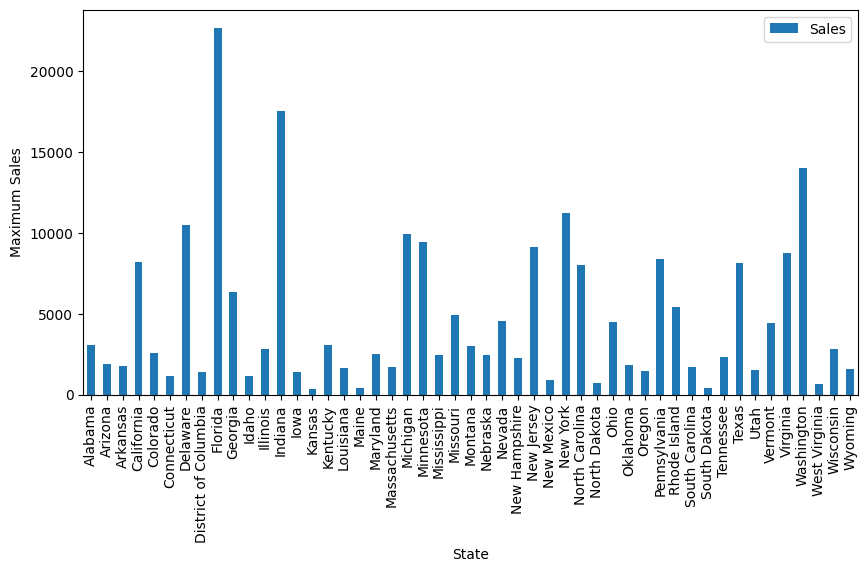

In [19]:
statesales_df.plot(kind='bar', ylabel='Maximum Sales',xlabel='State', figsize=(10, 5));

**Conclusion**:Maximum Sales are from Florida

In [20]:
state_sales_df = pd.pivot_table(data=df[['State','Sales']],
                        index=['State'],
                        values='Sales',
                        aggfunc='min')

state_sales_df.sort_values(by='Sales', ascending=True).head(10)

,Sales
State,
Texas,0.444
Illinois,0.836
Pennsylvania,0.852
California,0.990
Colorado,1.080
Oregon,1.080
Florida,1.167
New York,1.240
Washington,1.344


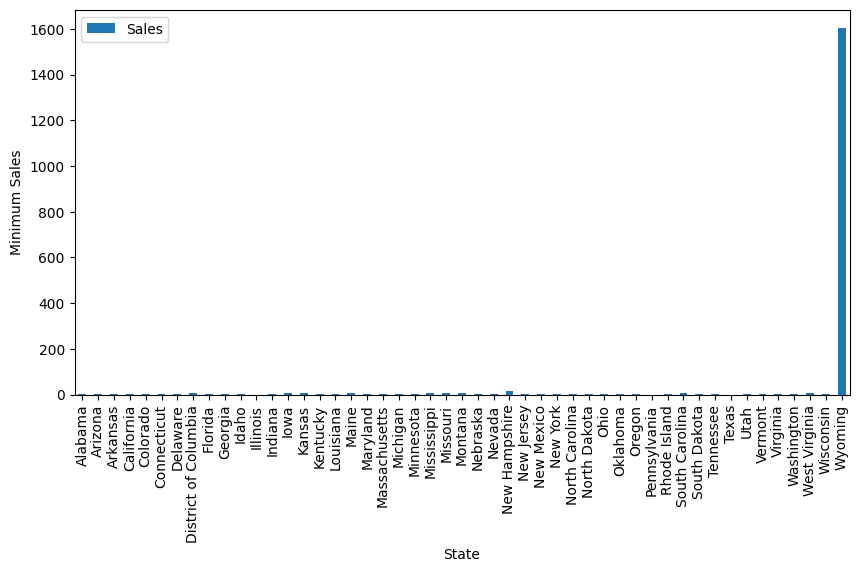

In [21]:
state_sales_df.plot(kind='bar', ylabel='Minimum Sales',xlabel='State', figsize=(10, 5));

**Conclusion**: Minimum sales are from Texas

In [22]:
stateprofit_df = pd.pivot_table(data=df[['State','Profit']],
                        index=['State'],
                        values='Profit',
                        aggfunc='max')

stateprofit_df.sort_values(by='Profit', ascending=False).head(5)

,Profit
State,
Indiana,8399.9760
Washington,6719.9808
Delaware,5039.9856
Michigan,4946.3700
Minnesota,4630.4755


<Axes: xlabel='State', ylabel='Maximum Profit'>

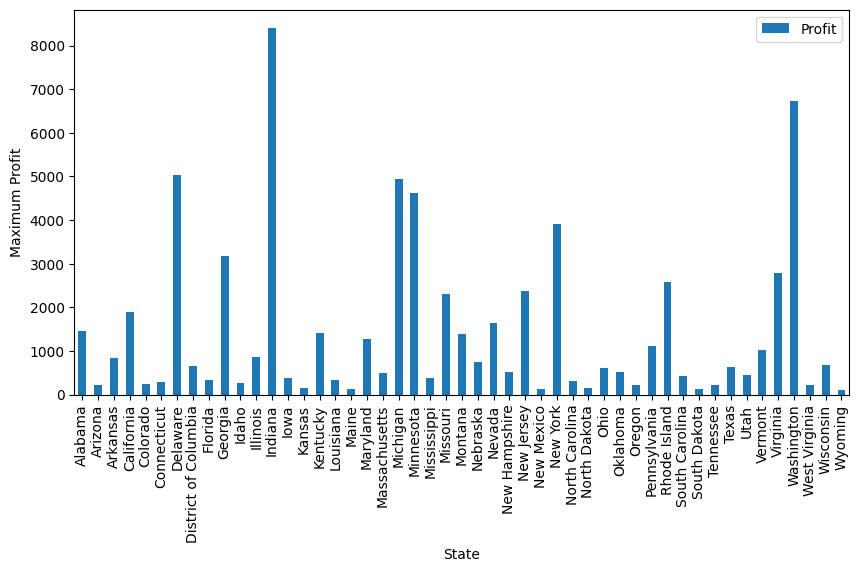

In [24]:
stateprofit_df.plot(kind='bar', ylabel='Maximum Profit',xlabel='State', figsize=(10, 5))

**Conclusion**: Maximum profit by Indiana state.

In [25]:
state_profit_df = pd.pivot_table(data=df[['State','Profit']],
                        index=['State'],
                        values='Profit',
                        aggfunc='min')

state_profit_df.sort_values(by='Profit', ascending=True).head(5)

,Profit
State,
Ohio,-6599.9780
North Carolina,-3839.9904
Texas,-3701.8928
Colorado,-3399.9800
Illinois,-2929.4845


<Axes: xlabel='State', ylabel='Minimum Profit'>

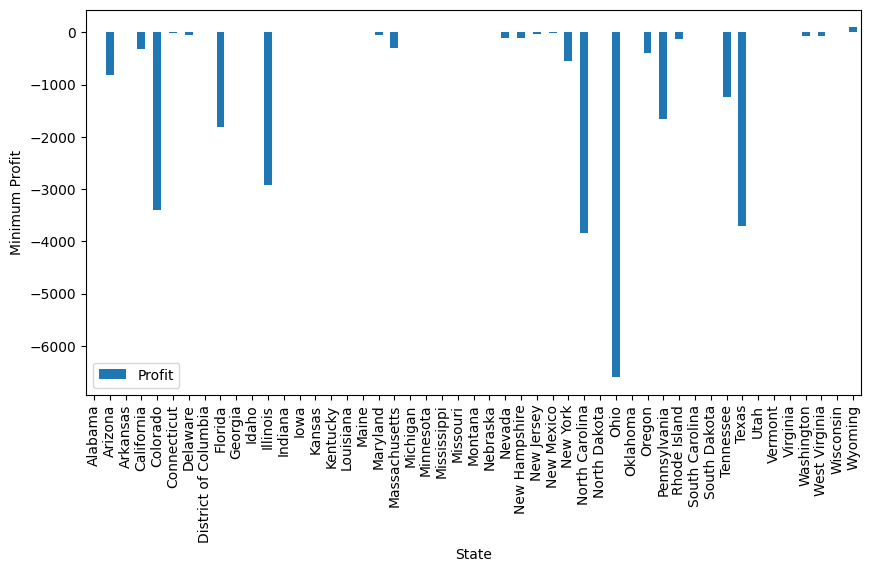

In [26]:
state_profit_df.plot(kind='bar', ylabel='Minimum Profit',xlabel='State', figsize=(10, 5))

In [27]:
#products purchased in more quantity

df_Category_quantity = pd.pivot_table(data=df[['Category','Sub-Category','Quantity']],
                        index=['Category','Sub-Category'],
                        values='Quantity',
                        aggfunc='sum')

df_Category_quantity

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

In [28]:
#products by which we got minimum profit

df_Category_profit = pd.pivot_table(data=df[['Category','Sub-Category','Profit']],
                        index=['Category','Sub-Category'],
                        values='Profit',
                        aggfunc='min')

df_Category_profit

Profit
Category        Sub-Category           
Furniture       Bookcases    -1665.0522
                Chairs        -630.8820
                Furnishings   -427.4500
                Tables       -1862.3124
Office Supplies Appliances   -1181.2824
                Art              0.1533
                Binders      -3701.8928
                Envelopes        0.5508
                Fasteners      -11.8256
                Labels           0.6786
                Paper            1.0700
                Storage       -337.8060
                Supplies     -1049.3406
Technology      Accessories    -75.5958
                Copiers         59.9980
                Machines     -6599.9780
                Phones        -386.3916

Unique elements/values in dataframe

In [29]:
print(df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [30]:
print(df['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [31]:
print(df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [32]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

**Visualizations**

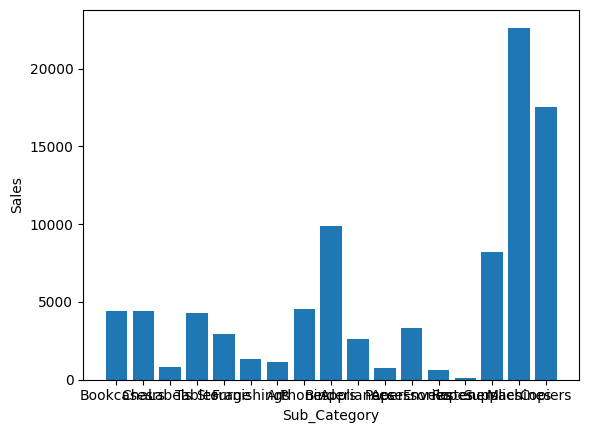

In [36]:
plt.bar(df['Sub-Category'],df['Sales']);
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

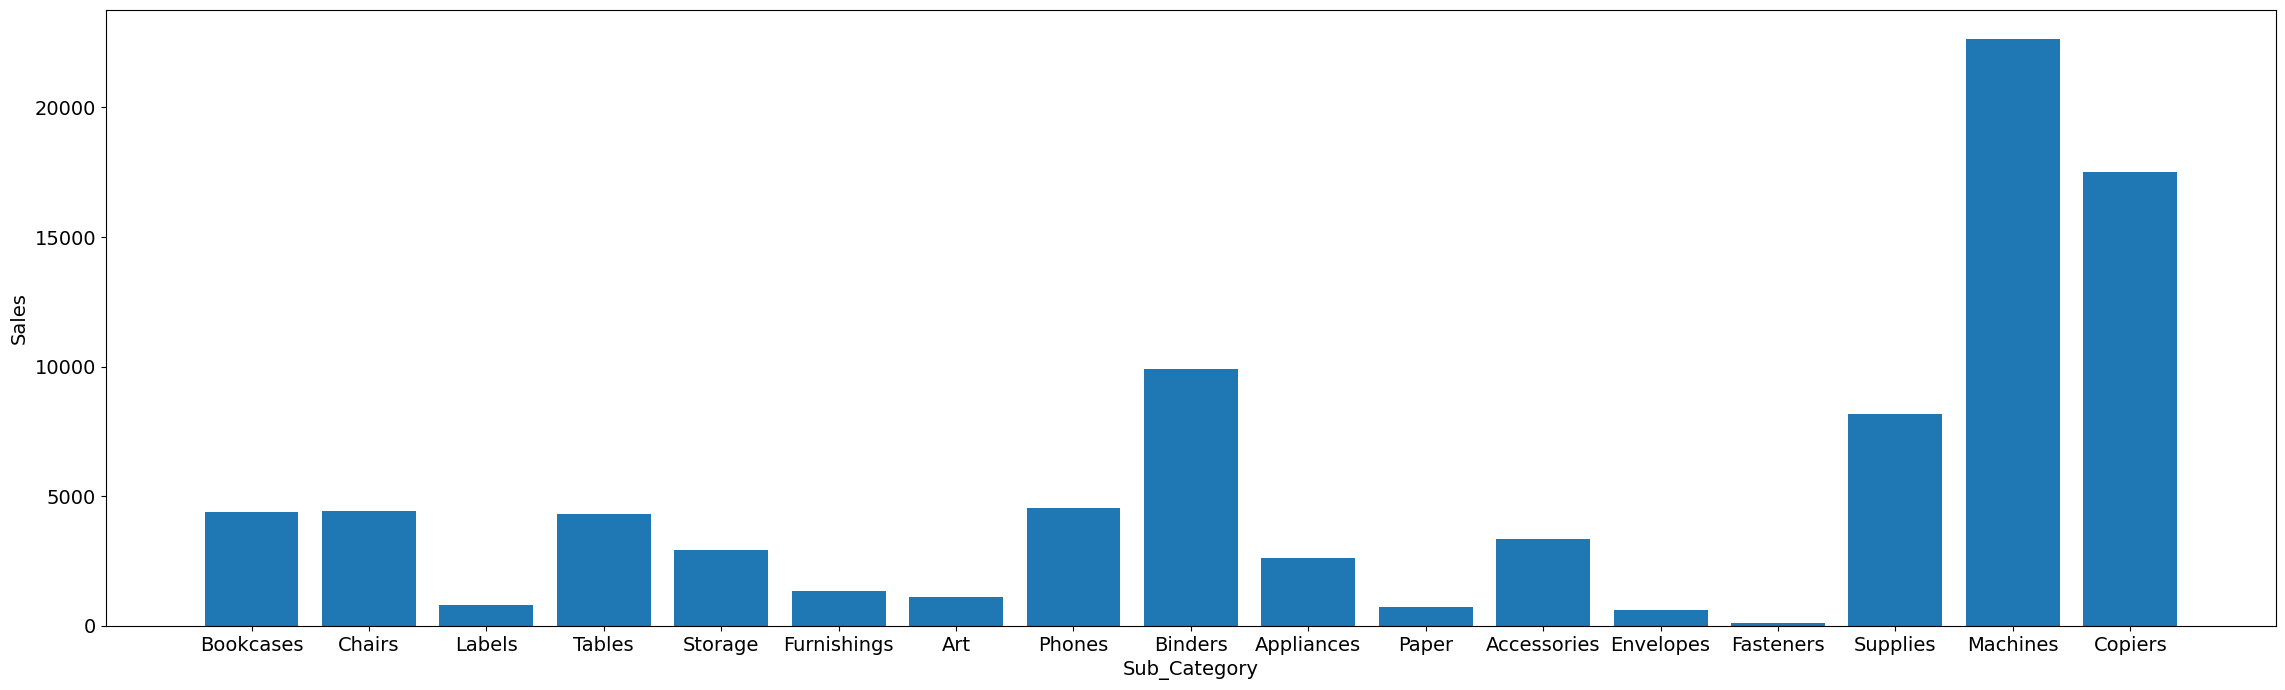

In [39]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'],df['Sales']);
plt.rcParams.update({'font.size':20});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

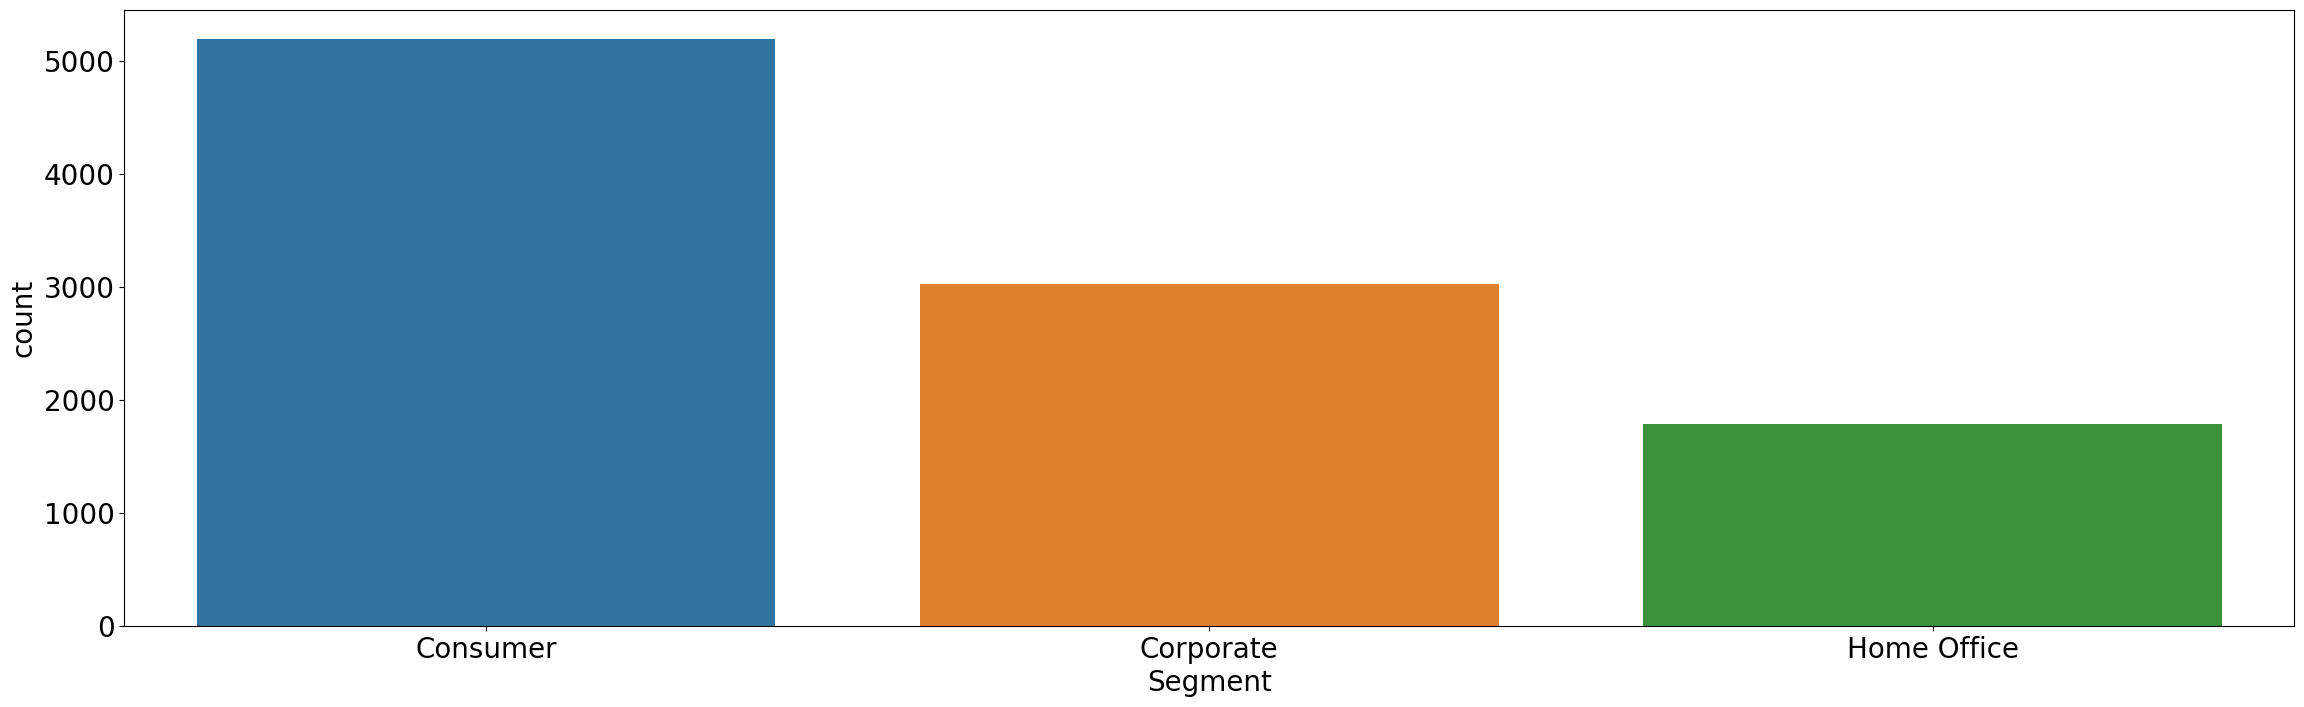

In [40]:
sns.countplot(x=df.Segment)
plt.show();

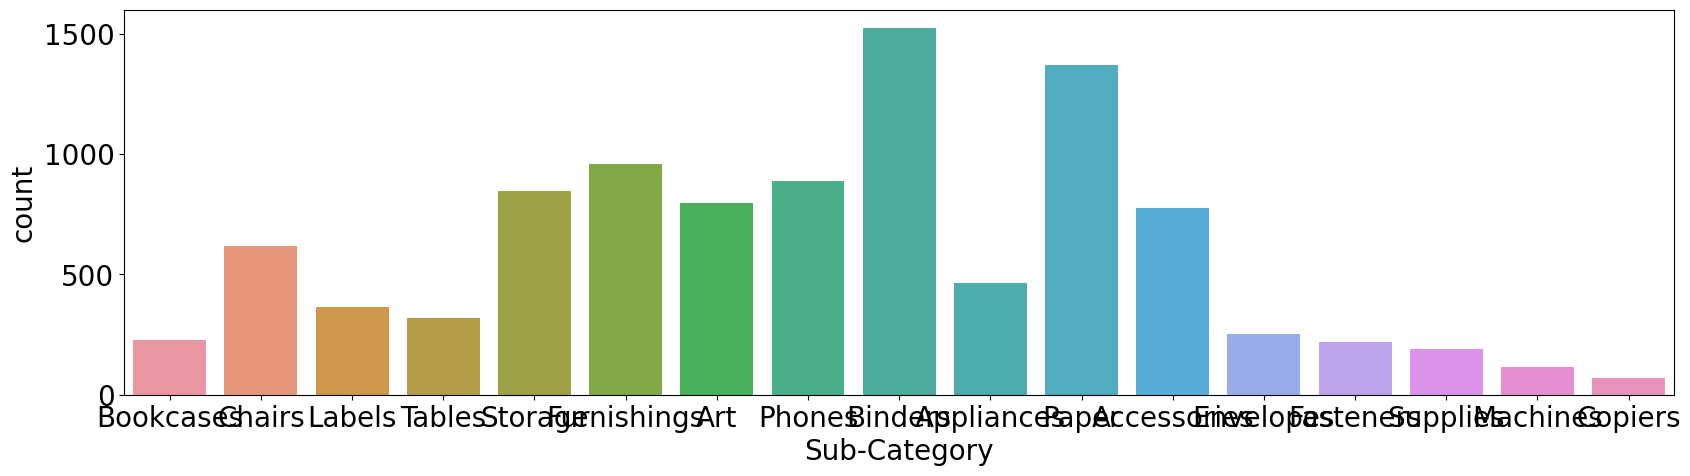

In [42]:
plt.rcParams['figure.figsize']=(20,5)
sns.countplot(x='Sub-Category',data=df)
plt.show()

In [46]:
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

<ipython-input-48-d9101e4436a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Reds',annot=True);


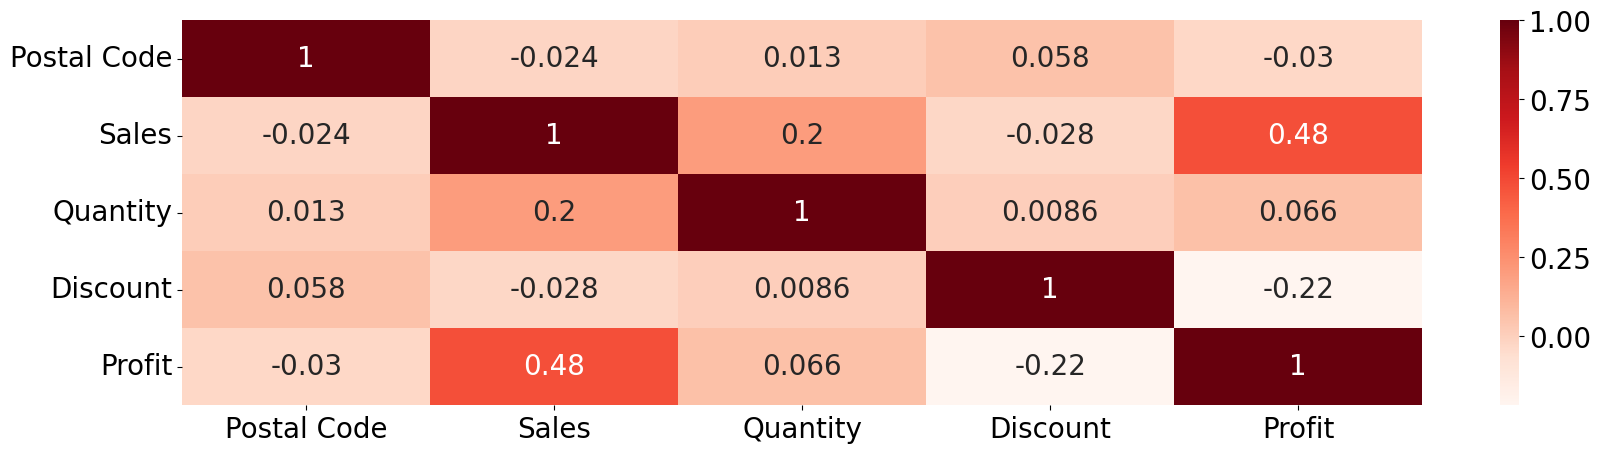

In [48]:
sns.heatmap(df.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)

**Final Conclusion**:
1. Most of the customers have preferred Standard Class compared to others
2. Maximum sales are from Florida
3. Minimum sales are from Texas
4. Maximum profit by Indiana state
5. Minimum profit by Ohio state
6. There are 49 unique states in the dataset